# Predicting the Sle Price of Bulldozers Using ML

## 1.Problem Definition

> How we predict future sale price of the bulldozer, using it characteristics and previous sales of bulldozers.

## 2.Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/overview

There are 3 data sets

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3.Evaluat

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluationion

## 4.Fea

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharingtures

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sklearn

In [2]:
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

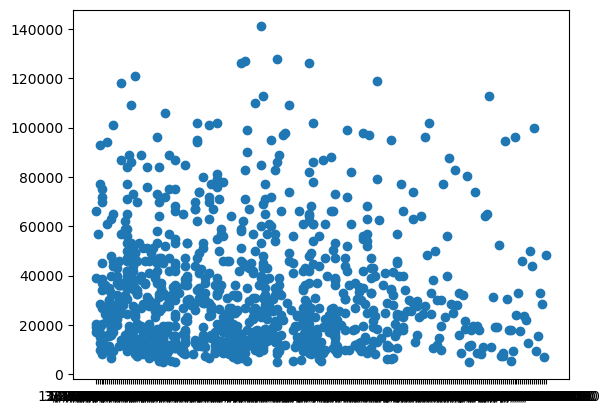

In [6]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

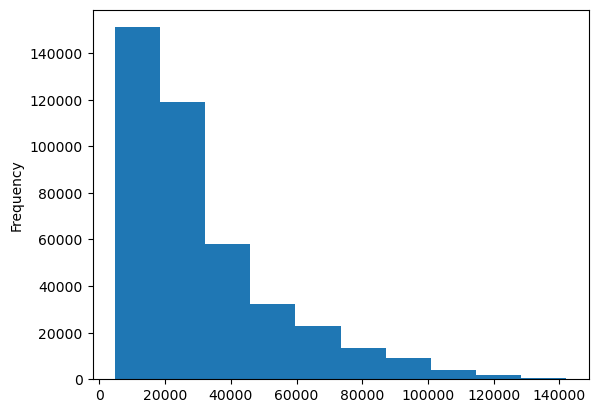

In [7]:
df.SalePrice.plot.hist()

### Parsing dates
When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [8]:
# Import data with parse date
df=pd.read_csv("data/TrainAndValid.csv",
               low_memory=False,
              parse_dates=["saledate"])

In [9]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

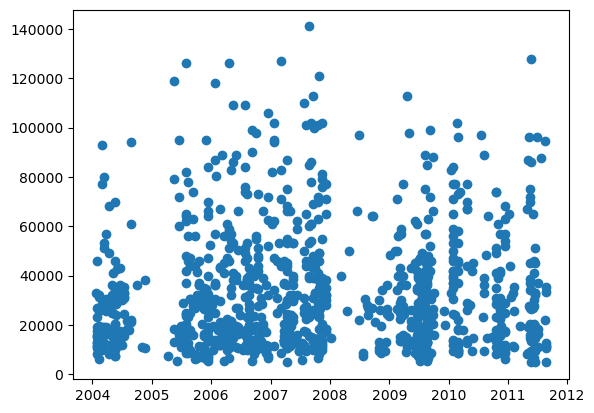

In [10]:
 fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [11]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort FataFrame by saleDate



In [14]:
# Sort DataFrame in order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy we have still got our original data

In [15]:
# Make a copy
df_temp=df.copy()

### Add datetime parameter `saledate` column

In [16]:
df_temp["saleYear"]=df_temp["saledate"].dt.year
df_temp["saleMonth"]=df_temp["saledate"].dt.month
df_temp["saleDay"]=df_temp.saledate.dt.day
df_temp["saleDayOfWeek"]=df_temp.saledate.dt.day_of_week
df_temp["saleDayOfYear"]=df_temp.saledate.dt.day_of_year

In [17]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
# Now we have date time features,now we can remove "salesDate"
df_temp.drop("saledate",axis=1,inplace=True)

In [19]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [20]:
df_temp["UsageBand"].dtype

dtype('O')

In [21]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Conert string to categories

turn all our data into numbers by converting them into pandas catgories

In [22]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

False

In [23]:
len(df_temp)

412698

In [24]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        df_temp[label]=content.astype("category").cat.as_ordered()

In [26]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [27]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

df_temp.state.cat.codes

***Deal with missing data***

In [29]:
df_temp.isnull().sum()/ len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [30]:
#Export current tmp dataFrame
df_temp.to_csv("data/train_tmp.csv",index=False)

In [31]:
# Import preprocessed data
df_temp=pd.read_csv("data/train_tmp.csv",low_memory=False)
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Filling missing values

### Fill numeric missing values First

In [32]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [33]:
# check numeric columns that has missing values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [34]:
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_temp[label+"_is_missing"]=pd.isnull(content)
            #Fill missing numeric values median
            df_temp[label]=content.fillna(content.median())

In [35]:
# Check is there are any null values
for label,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        else:
            print("No null values")

No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values
No null values


In [36]:
# check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [37]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling & turning categorical variables into number

In [38]:
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [40]:
# Turn categorical variables into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column which tells us if the data was missing
        df_temp[label+"_is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add +1
        df_temp[label]=pd.Categorical(content).codes+1

In [41]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [42]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [43]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [44]:
df_temp.isna().sum().head(20)

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

***Now all the data are numeric so we try to build machine learning model.***

In [45]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [46]:
# importing ML model RandomForest Regresser
from sklearn.ensemble import RandomForestRegressor

In [47]:
%%time
# Create the model
model=RandomForestRegressor(n_jobs=-1,random_state=42)

# Fit the model
model.fit(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

CPU times: total: 25min 45s
Wall time: 3min 53s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
# Score the model
model.score(df_temp.drop("SalePrice",axis=1),df_temp["SalePrice"])

0.9875468079970562

### Spliting data into train/validation sets

In [49]:
df_temp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [50]:
df_temp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [51]:
# Split data into training and validation 
df_val =df_temp[df_temp.saleYear==2012]
df_train=df_temp[df_temp.saleYear!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [52]:
# Split data into X & y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [53]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building Evaluation function

In [54]:
# Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
        Calculate root mean squared log error between prediction and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluae model on a few different levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={
        "Training MAE":mean_absolute_error(y_train,train_preds),
        "Valid MAE":mean_absolute_error(y_valid,val_preds),
        "Training RMSLE":rmsle(y_train,train_preds),
        "Valid RMSLE":rmsle(y_valid,val_preds),
        "Training R^2":r2_score(y_train,train_preds),
        "Valid R^2":r2_score(y_valid,val_preds)
    }
    return scores

### Testing our model on subset(to tune the hyperparameters)

In [55]:
# Change max_samples value
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [56]:
%time
# reduce time to train
model.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [57]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tunining with RandomizedSearchCV

In [58]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1,random_state=42),
    param_distributions=rf_grid,
    n_iter=2,
    cv=5,
    verbose=True
)

# Fiting the data
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 27 s
Wall time: 8.81 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [59]:
#Find the best hyperparameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 16,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [60]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 9837.325081274339,
 'Valid MAE': 11320.116761628024,
 'Training RMSLE': 0.42273465004097976,
 'Valid RMSLE': 0.4406637981249553,
 'Training R^2': 0.6218392980971473,
 'Valid R^2': 0.6318282276328909}

In [61]:
%%time
# Instantiate RandomizedSearchCV model 2
rs_model_2=RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1,random_state=42),
    param_distributions=rf_grid,
    n_iter=100,
    cv=5,
    verbose=True
)

# Fiting the data
rs_model_2.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


D:\My Projects\Buldozer-Price-Prediction_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "D:\My Projects\Buldozer-Price-Prediction_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\My Projects\Buldozer-Price-Prediction_project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\My Projects\Buldozer-Price-Prediction_project\env\Lib\site-packages\sklearn\base.py", li

CPU times: total: 26min 41s
Wall time: 7min 40s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
rs_model_2.best_params_,rs_model.best_params_

({'n_estimators': 20,
  'min_samples_split': 14,
  'min_samples_leaf': 5,
  'max_samples': 10000,
  'max_features': 0.5,
  'max_depth': None},
 {'n_estimators': 30,
  'min_samples_split': 16,
  'min_samples_leaf': 5,
  'max_samples': 10000,
  'max_features': 0.5,
  'max_depth': 5})

In [63]:
pd.DataFrame([rs_model_2.best_params_, rs_model.best_params_],
                         index=['rs_model_2', 'rs_model'])

,n_estimators,min_samples_split,min_samples_leaf,max_samples,max_features,max_depth
rs_model_2,20,14,5,10000,0.5,NaN
rs_model,30,16,5,10000,0.5,5.0


In [67]:
pd.DataFrame([show_scores(rs_model),show_scores(rs_model_2)],index=['rs_model','rs_model_2'] )

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2
rs_model,9837.325081,11320.116762,0.422735,0.440664,0.621839,0.631828
rs_model_2,6217.421218,7710.976273,0.281042,0.310064,0.827849,0.803380


In [71]:
%%time
rf_grid_model_3 = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "log2"],  # Removed 'auto'
    "max_samples": [10000]
}

# Instantiate RandomizedSearchCV model 2
rs_model_3 = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid_model_3,
    n_iter=100,
    cv=5,
    verbose=True
)

# Fitting the data
rs_model_3.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 33min 33s
Wall time: 8min 38s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [73]:
pd.DataFrame([show_scores(rs_model),show_scores(rs_model_2),show_scores(rs_model_3)],index=['rs_model','rs_model_2','rs_model_3'] )

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2
rs_model,9837.325081,11320.116762,0.422735,0.440664,0.621839,0.631828
rs_model_2,6286.542381,7665.191570,0.283931,0.308622,0.824171,0.808573
rs_model_3,6051.751421,7405.665599,0.274829,0.300540,0.836118,0.820405


In [74]:
rs_model_3.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

### Train Model with the best Hyperparamter

In [81]:
%%time
#Most ideal hyperparameters
ideal_model=RandomForestRegressor(n_estimators=60,min_samples_split=2,
                                 min_samples_leaf=5,
                                 max_samples=None,
                                 max_features=0.5,
                                 max_depth=None,
                                 n_jobs=-1)
#Fit the model
ideal_model.fit(X_train,y_train)

CPU times: total: 6min 51s
Wall time: 56.4 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5, n_estimators=60,
                      n_jobs=-1)

In [82]:
show_scores(ideal_model)

{'Training MAE': 3124.269289235625,
 'Valid MAE': 5966.6167225536,
 'Training RMSLE': 0.15435584989133247,
 'Valid RMSLE': 0.24418689868114618,
 'Training R^2': 0.952060706816049,
 'Valid R^2': 0.8799053574871873}

## Make predictions on test data

In [175]:
#import test data
df_test=pd.read_csv("data/Test.csv",
                   low_memory=False,
                   parse_dates=["saledate"])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


### Preprocessing the data for testing

In [176]:
import pandas as pd

def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    df["saleYear"]=df["saledate"].dt.year
    df["saleMonth"]=df["saledate"].dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.day_of_week
    df["saleDayOfYear"]=df.saledate.dt.day_of_year

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data is missing
                df[label + "_is_missing"] = pd.isnull(content)
                # Fill missing numeric values
                df[label] = content.fillna(content.median())

        # Filled categorical missing values
        if not pd.api.types.is_numeric_dtype(content):
            df[label + "_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
            
    return df


In [177]:
# Process the test data
df_test_final=preprocess_data(df_test)
df_test_final

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [178]:
df_test_final.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [179]:
#  Finding how the columns differ using sets
set(X_train.columns)-set(df_test_final.columns)

{'auctioneerID_is_missing'}

In [180]:
# Manually add the auctioneerID_is_missing to df_test_final
position_missing_column=X_train.columns.get_loc("auctioneerID_is_missing")
df_test_final.insert(position_missing_column, "auctioneerID_is_missing", False)

df_test_final.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


Now Test and Train dataframes has same features, we can make predictions

### Make predication on updated test data

In [182]:
test_preds=ideal_model.predict(df_test_final)
test_preds

array([17635.03653667, 16270.46390021, 47260.95509052, ...,
       12806.76016923, 16070.27323718, 26808.19320297])

### Changing of format of predictions

In [183]:
# Format Predictios
df_preds=pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds


,SalesID,SalePrice
0,1227829,17635.036537
1,1227844,16270.463900
2,1227847,47260.955091
3,1227848,64380.831723
4,1227863,55284.688224
...,...,...
12452,6643171,40947.173280
12453,6643173,11226.996979
12454,6643184,12806.760169
12455,6643186,16070.273237


In [184]:
df_preds.to_csv("data/test_predictions.csv")

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable.
When it comes to predicting the *target variable* (SalePrice)

In [185]:
# Find feature  importance of our best model
ideal_model.feature_importances_

array([3.29658135e-02, 2.17610006e-02, 3.99747967e-02, 1.86398081e-03,
       2.98190529e-03, 2.00020186e-01, 2.74759586e-03, 9.36098390e-04,
       4.74699400e-02, 4.55094372e-02, 7.04002353e-02, 4.74481052e-03,
       2.02559180e-02, 1.48130525e-01, 4.37114035e-02, 5.64026977e-03,
       3.14647571e-03, 2.54488638e-03, 4.03952203e-03, 5.30933380e-02,
       2.31068145e-04, 4.35636061e-05, 8.92667384e-04, 2.05071496e-04,
       8.39525981e-04, 1.14664498e-05, 1.49355517e-03, 8.38942395e-03,
       2.92823964e-03, 1.26643198e-04, 5.16858788e-03, 2.46574358e-03,
       3.98147237e-03, 7.24788315e-04, 3.22352810e-04, 1.44280351e-02,
       7.18263844e-04, 1.37800624e-02, 1.30671374e-03, 1.71058982e-03,
       1.23491285e-03, 7.34230749e-04, 8.69189391e-04, 4.59030309e-04,
       4.06304597e-04, 2.55867240e-04, 3.70843329e-04, 3.52736069e-03,
       1.37710474e-03, 2.37372695e-04, 2.39014469e-04, 7.36380012e-02,
       4.01155324e-03, 5.41570339e-03, 2.66468226e-03, 9.61548982e-03,
      

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_features(columns, importances, n=20):
    """
    Plots the top n features based on their importance.
    
    Parameters:
    columns (list of str): The feature names.
    importances (list of float): The importance scores of the features.
    n (int): The number of top features to plot.
    """
    # Create a DataFrame with features and their importances
    df = (pd.DataFrame({"features": columns, "feature_importance": importances})
            .sort_values("feature_importance", ascending=False)
            .reset_index(drop=True))

    # Plot the DataFrame
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df["features"][:n], df["feature_importance"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.set_title("Top {} Features by Importance".format(n))
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

# Example usage:
# plot_features(columns, importances, n=20)


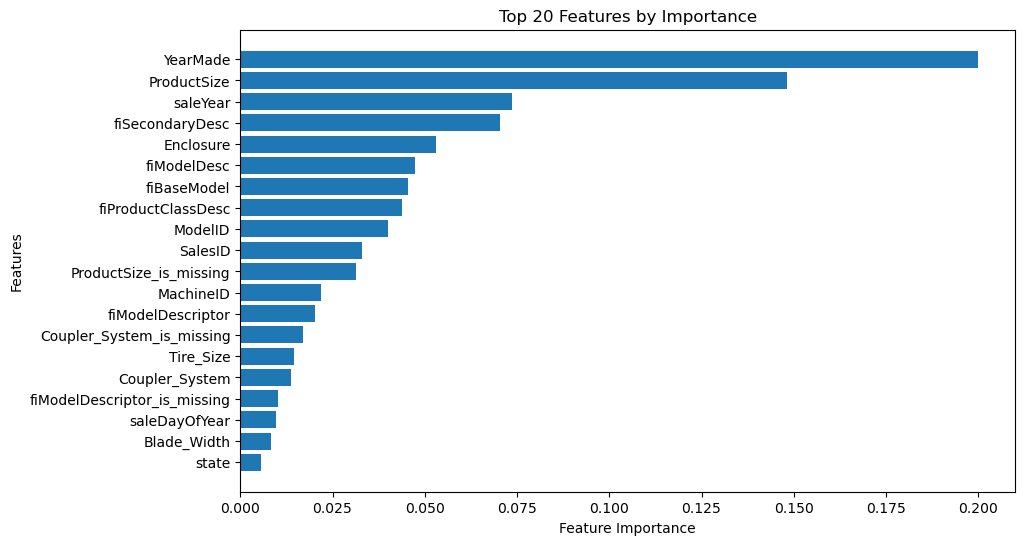

In [191]:
plot_features(X_train.columns,ideal_model.feature_importances_)

## Saving Ideal Macine Model


In [193]:
# Importing joblib
from joblib import dump,load
#Save the model to file
dump(ideal_model,filename="Buldozer-Price-Prediction_Model.joblib")

['Buldozer-Price-Prediction_Model.joblib']

In [194]:
# Iporting saved model
loaded_ML_model=load("Buldozer-Price-Prediction_Model.joblib")

In [195]:
Final_preds=loaded_ML_model.predict(df_test_final)
Final_preds

array([17635.03653667, 16270.46390021, 47260.95509052, ...,
       12806.76016923, 16070.27323718, 26808.19320297])

# END OF Buldozer-Price-Prediction ML Model